C:\Users\Hp\AppData\Local\Temp\ipykernel_12540\2105770734.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='date').sum().reset_index()


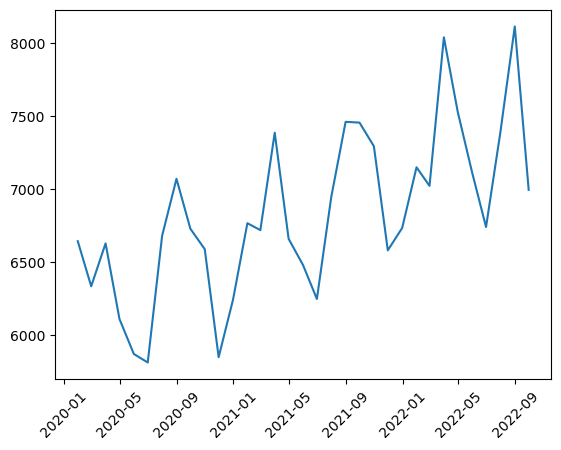

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Local\Temp\ipykernel_12540\2105770734.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_idx = pd.date_range(start=monthly['date'].iloc[-1] + pd.offsets.MonthBegin(), periods=6, freq='M')


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -242.545
Date:                Sun, 16 Nov 2025   AIC                            491.091
Time:                        08:13:02   BIC                            495.488
Sample:                             0   HQIC                           492.548
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3609      0.348      1.036      0.300      -0.322       1.044
ma.L1         -0.8104      0.227     -3.570      0.000      -1.255      -0.365
sigma2      2.168e+05   6.75e+04      3.213      0.0

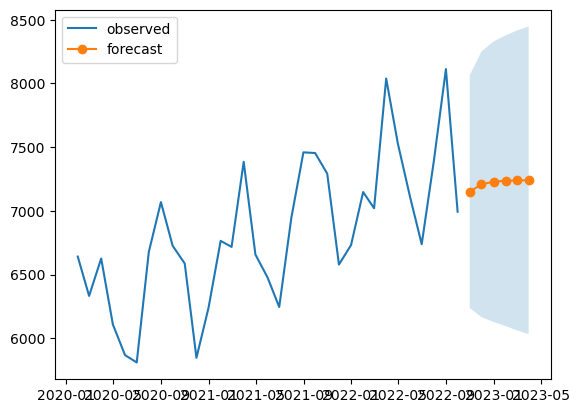

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods=1000, freq='D')
sales = 200 + np.sin(np.arange(len(dates))/30)*20 + np.linspace(0,50,len(dates)) + np.random.normal(0,10,len(dates))
df = pd.DataFrame({'date':dates,'sales':sales})
monthly = df.resample('M', on='date').sum().reset_index()
plt.plot(monthly['date'], monthly['sales']); plt.xticks(rotation=45); plt.show()
model = ARIMA(monthly['sales'], order=(1,1,1)).fit()
print(model.summary())
forecast = model.get_forecast(steps=6)
pred = forecast.predicted_mean
ci = forecast.conf_int()
future_idx = pd.date_range(start=monthly['date'].iloc[-1] + pd.offsets.MonthBegin(), periods=6, freq='M')
plt.plot(monthly['date'], monthly['sales'], label='observed')
plt.plot(future_idx, pred, marker='o', label='forecast')
plt.fill_between(future_idx, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)
plt.legend(); plt.show()